In [1]:
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [8]:
options(repr.plot.width=6, repr.plot.height=4)

In [9]:
estimates <- read_tsv("../output/nea_estimates.txt") %>% mutate(gen=as.integer((55000 - age) / 25))

Parsed with column specification:
cols(
  name = col_character(),
  nea = col_double(),
  age = col_integer(),
  snp_count = col_integer()
)


In [10]:
head(estimates)

name,nea,age,snp_count,gen
UstIshim,0.02834072,45020,479930,399
Kostenki14,0.02656486,37470,400947,701
GoyetQ116_1,0.02880845,34795,97356,808
Muierii2,0.02226141,33300,14154,868
Vestonice13,0.02894517,30870,23091,965
Vestonice16,0.02552449,30010,172180,999


## Fitting $s$ as a slope of the $log \frac{p}{1 - p}$ (example from Alan Rogers' lecture slides)

The slide describes mutant allele frequency $p$ over time. The selection coefficient is equal to the slope of $log\frac{p}{1-p}$. The example estimates $s = -0.004$.

In [11]:
gen <- c(0, 18, 25, 46, 60, 78, 95, 117, 135, 155)
p <- c(0.56, 0.57, 0.565, 0.525, 0.5, 0.51, 0.47, 0.46, 0.4, 0.41)

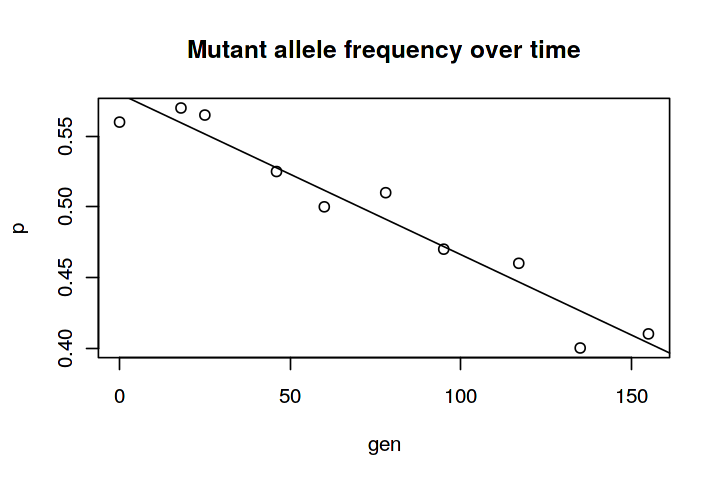

In [12]:
plot(gen, p, main="Mutant allele frequency over time")
abline(lm(p ~ gen))


Call:
lm(formula = log(p/(1 - p)) ~ gen)

Coefficients:
(Intercept)          gen  
   0.322325    -0.004593  


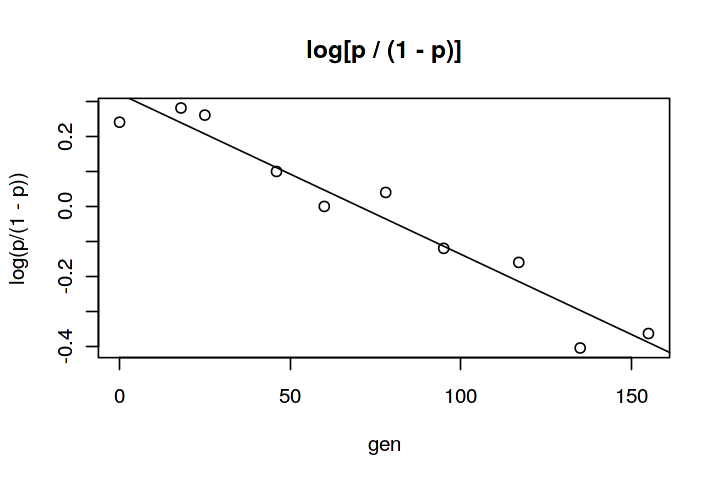

In [13]:
plot(gen, log(p / (1-p)), main="log[p / (1 - p)]")
(log_fit <- lm(log(p / (1-p)) ~ gen))
abline(log_fit)

## Same method of $log \frac{p}{1 - p}$ slope applied to our Nea. ancestry data

In [15]:
(lin_fit <- lm(nea ~ gen, data=estimates))


Call:
lm(formula = nea ~ gen, data = estimates)

Coefficients:
(Intercept)          gen  
  3.008e-02   -5.285e-06  



Call:
lm(formula = log(estimates$nea/(1 - estimates$nea)) ~ estimates$gen)

Coefficients:
  (Intercept)  estimates$gen  
    -3.441925      -0.000238  


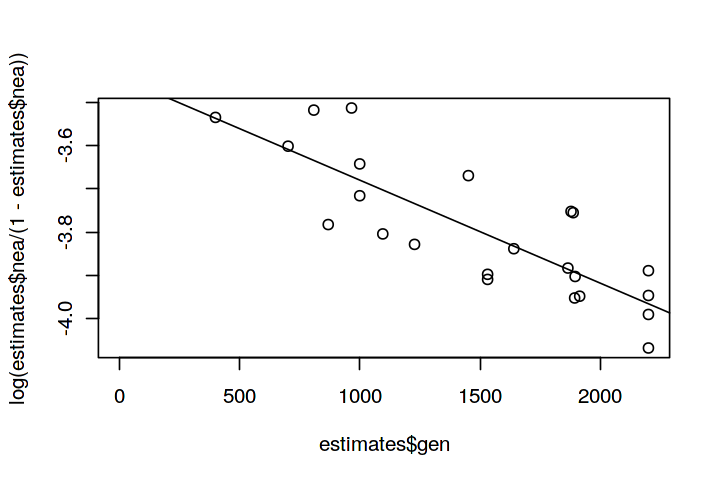

In [16]:
plot(estimates$gen, log(estimates$nea / (1 - estimates$nea)), xlim=c(0, 2200))
(log_fit <- lm(log(estimates$nea / (1 - estimates$nea)) ~ estimates$gen))
abline(log_fit)

Note that the slope corresponds to $s$ in the haploid case. To get (additive) value of the $s$ in the diploid case, one has to multiply this by 2.

In [13]:
log_fit$coefficients[["estimates$gen"]] * 2

[1] -0.0004760455

Which is the value estimated using maximum likelihood in the ML estimation notebook.